## AT&T

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
from aggregators import (
    race, 
    income, 
    redlining, 
    plot_race, 
    speed_breakdown, 
    unserved, 
    bucket_and_bin
)

In [3]:
# inputs
fn_att = '../data/output/speed_price_att.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_att.csv'
fn_fig3a = '../data/output/figs/fig3_income.csv'
fn_fig3b = '../data/output/figs/fig3_race.csv'
fn_fig3c = '../data/output/figs/fig3_redline.csv'

In [4]:
att = pd.read_csv(fn_att, compression='gzip')
len(att)

432303

In [5]:
(432303 - 349703) / 432303

0.19106968954645237

In [6]:
att.major_city.nunique()

20

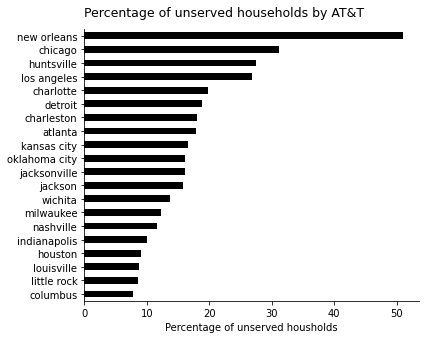

In [7]:
unserved(att, isp='AT&T')

In [8]:
att = att[att.speed_down != 0]
len(att)

349703

In [9]:
len(att)

349703

In [10]:
len(att[att.speed_down <= 6])

33671

In [11]:
att = bucket_and_bin(att)

In [12]:
att.fastest_speed_down.max()

5000.0

In [13]:
# who gets options?
att[(att['speed_down'] != att['fastest_speed_down']) &
    (~att['fastest_speed_down'].isnull())]['speed_down'].value_counts(normalize=True)

300.0     0.999974
500.0     0.000007
100.0     0.000007
2000.0    0.000007
25.0      0.000007
Name: speed_down, dtype: float64

In [14]:
# make the above for each city:
city2speeds = pd.DataFrame()
for (city, state), _df in att.groupby(['major_city', 'state']):
    row = _df.speed_down_bins.value_counts(normalize=True, sort=False).to_frame().T
    row.reset_index(drop=True, inplace=True)
    row['major_city'] = city.title()
    row['state'] = state
    city2speeds = city2speeds.append(row)
city2speeds.to_csv(fn_speed, index=False)

<ipython-input-14-cf0a05e75c56>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-14-cf0a05e75c56>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-14-cf0a05e75c56>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-14-cf0a05e75c56>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-14-cf0a05e75c56>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [15]:
variety = att.groupby(['major_city', 'state']).speed_down_bins.value_counts(normalize=True)
homogenous_cities = variety[variety >= .95].index.get_level_values(0)
len(homogenous_cities)

0

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


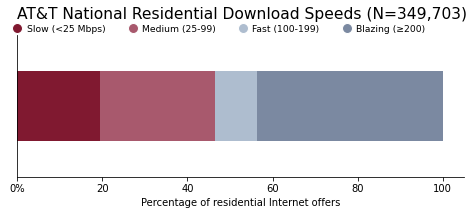

In [16]:
speed_breakdown(att)

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


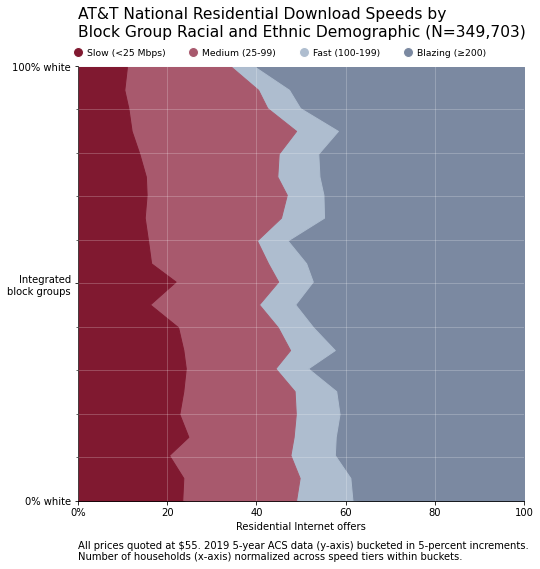

In [17]:
plot_race(att)

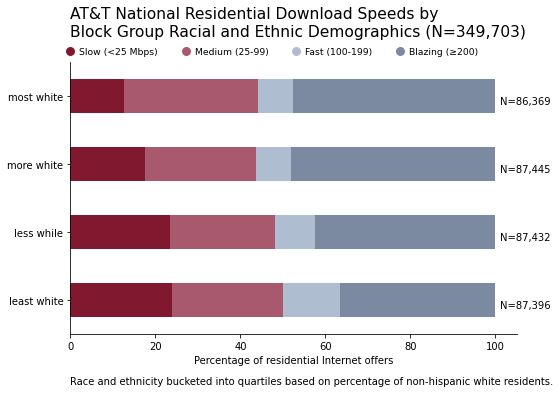

In [18]:
race(att)

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


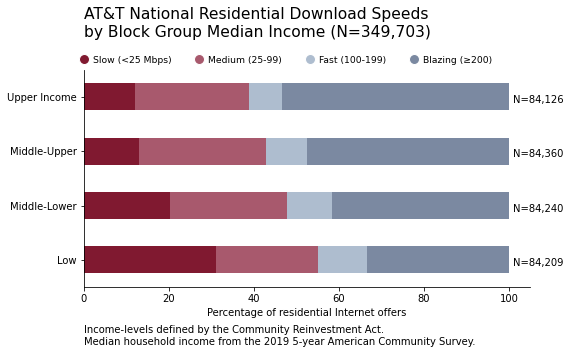

In [19]:
income(att)

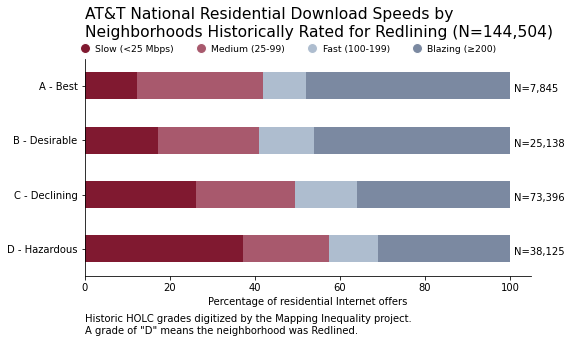

In [20]:
redlining(att)

## City by City

atlanta


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


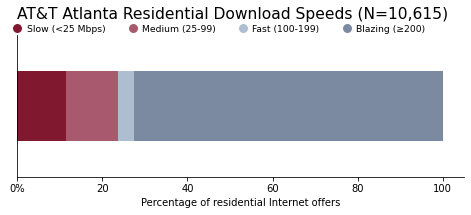

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


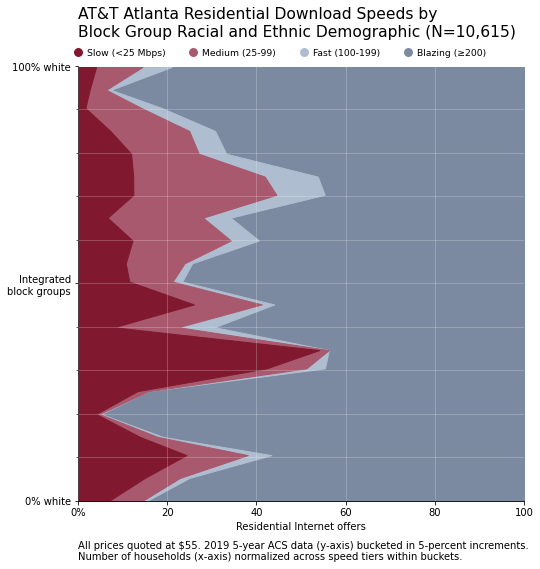

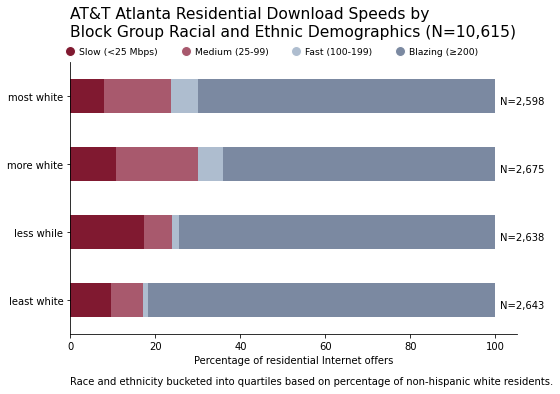

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


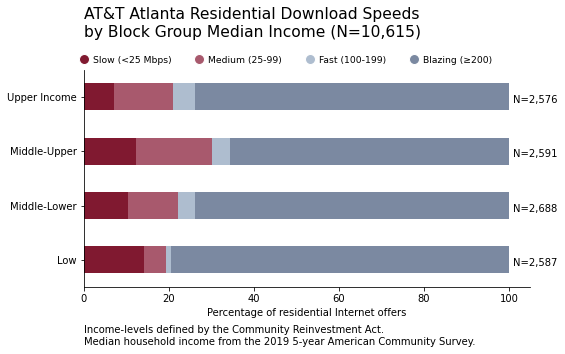

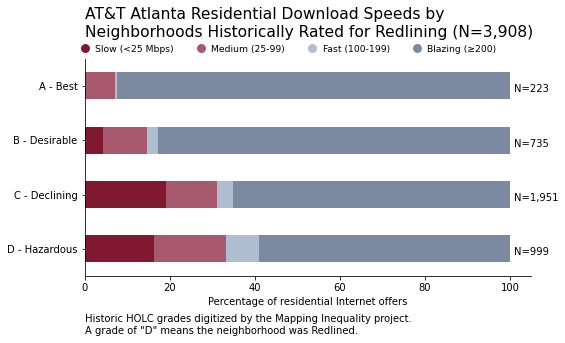

*******************************************************************************
charleston


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


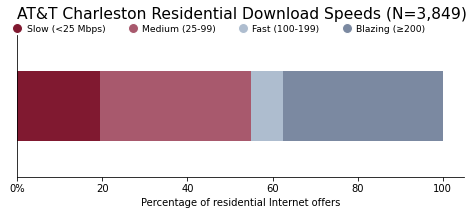

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


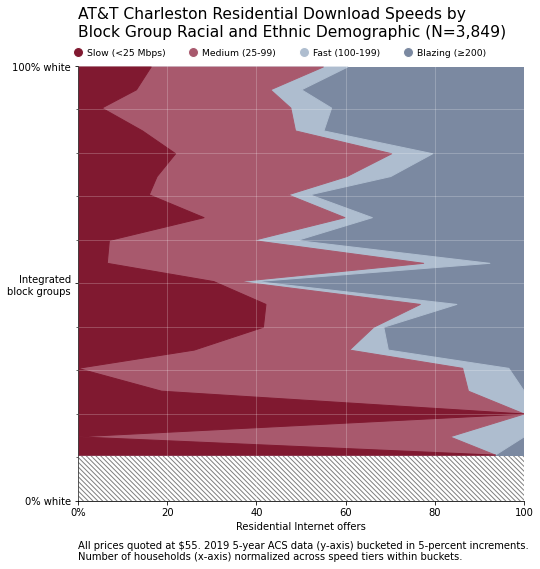

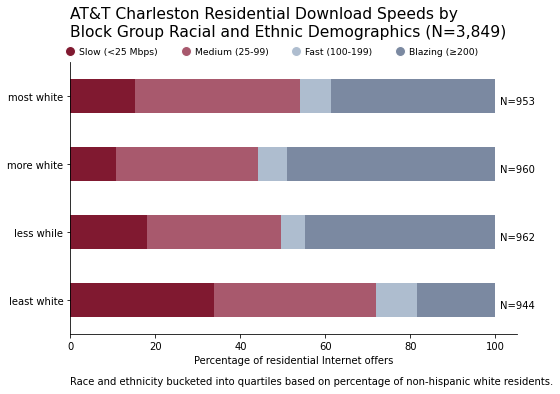

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


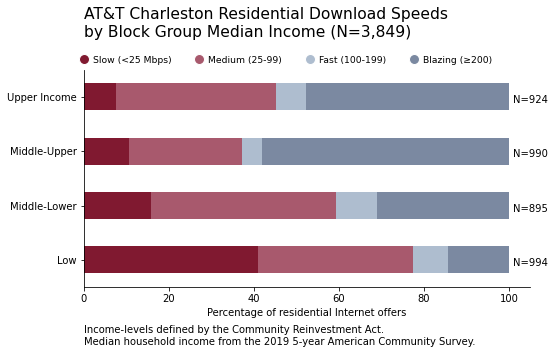

*******************************************************************************
charlotte


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


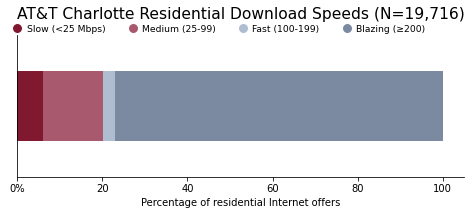

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


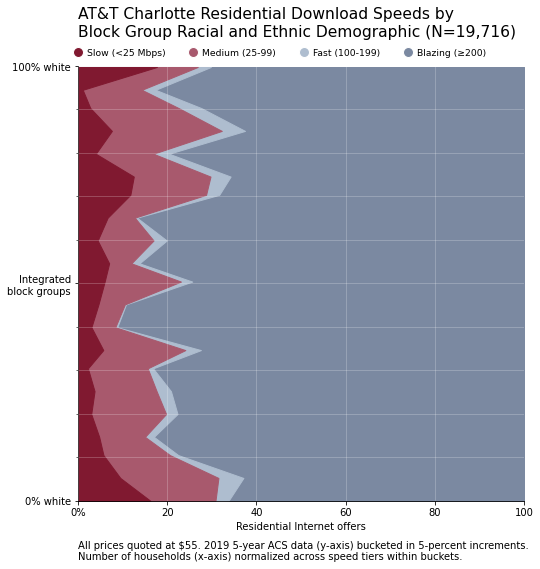

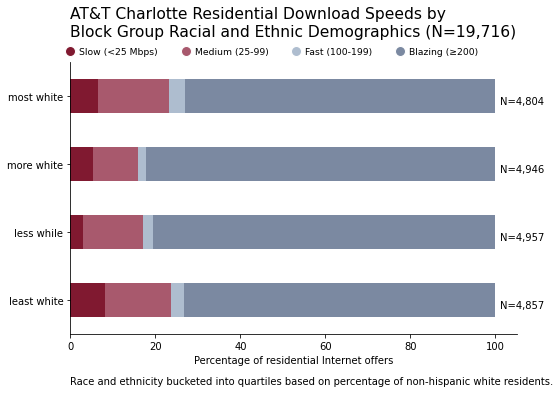

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


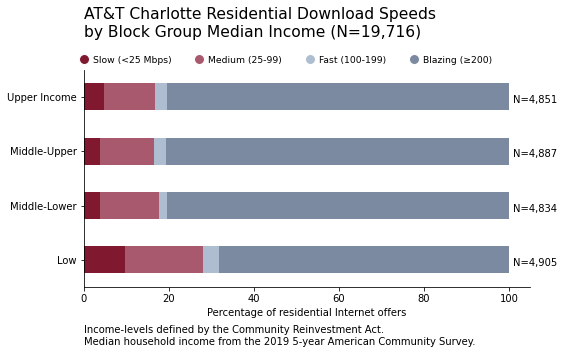

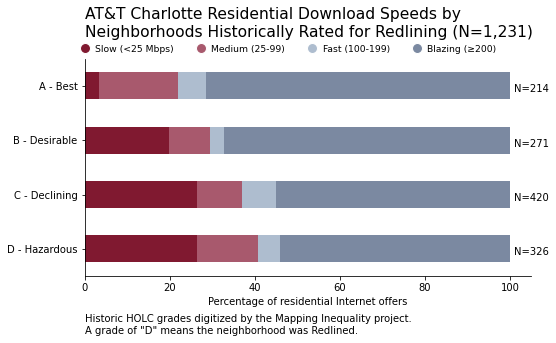

*******************************************************************************
chicago


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


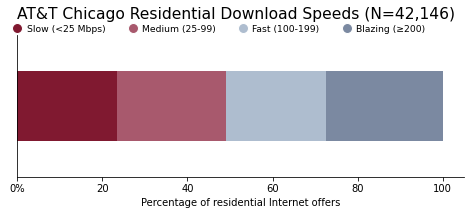

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


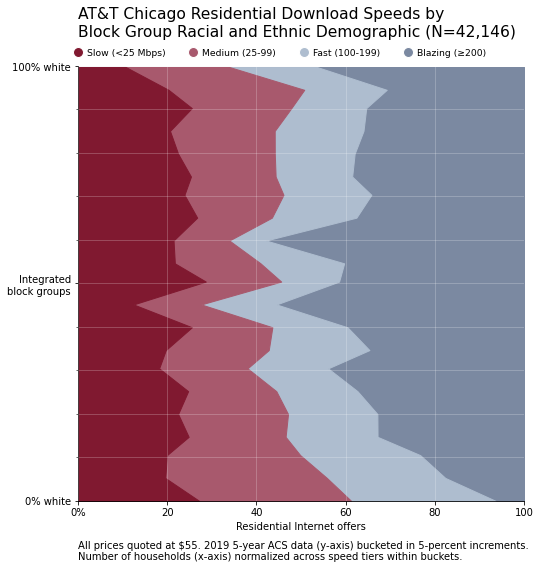

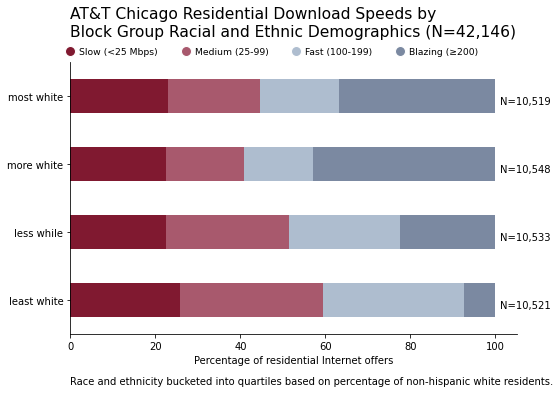

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


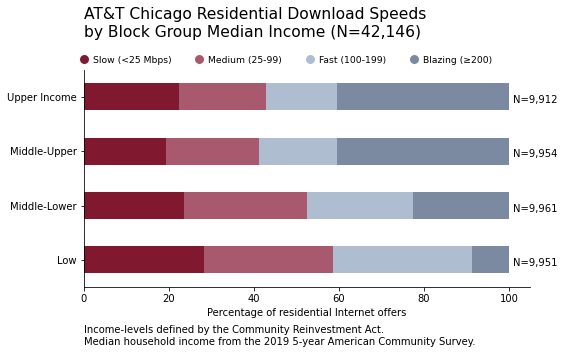

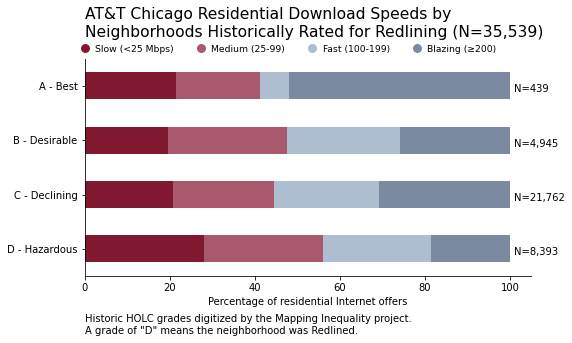

*******************************************************************************
columbus


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


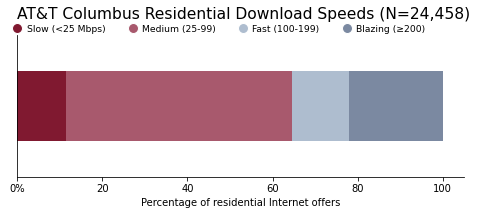

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


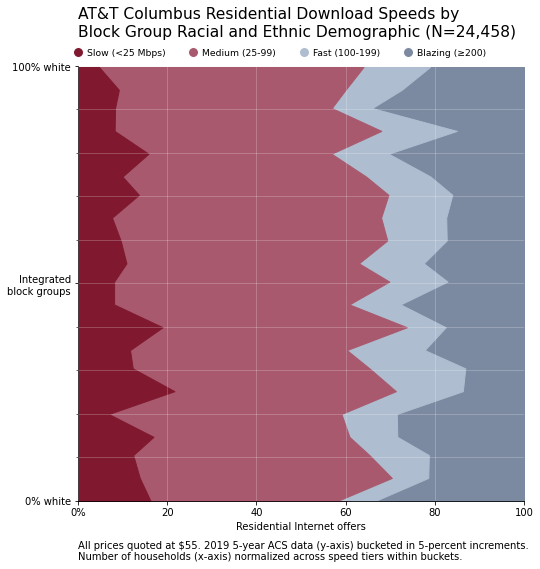

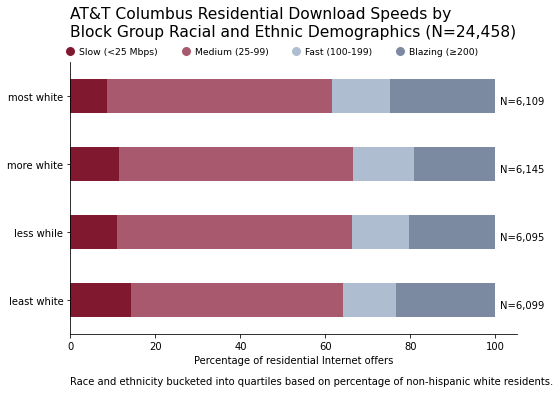

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


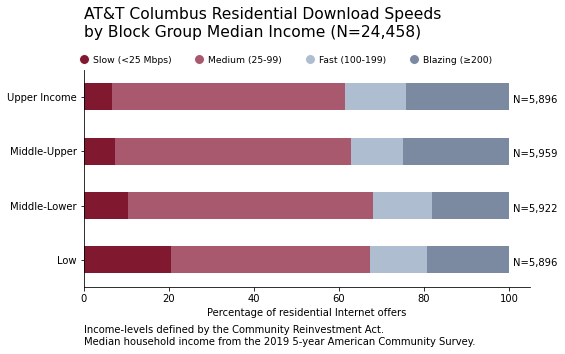

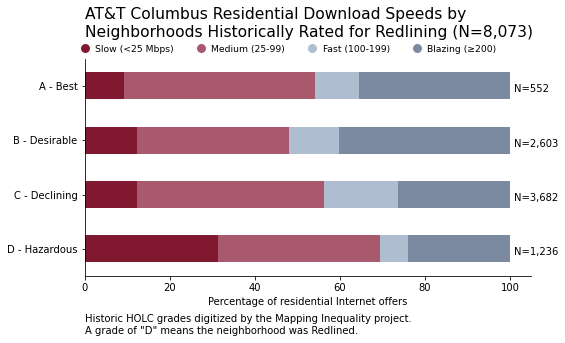

*******************************************************************************
detroit


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


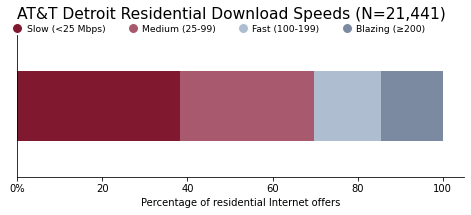

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


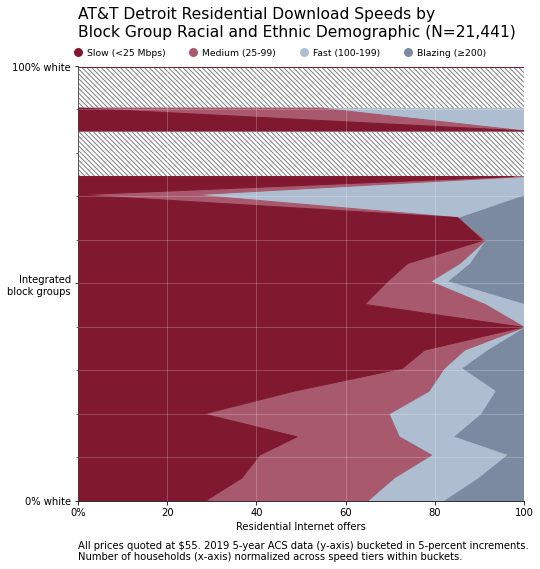

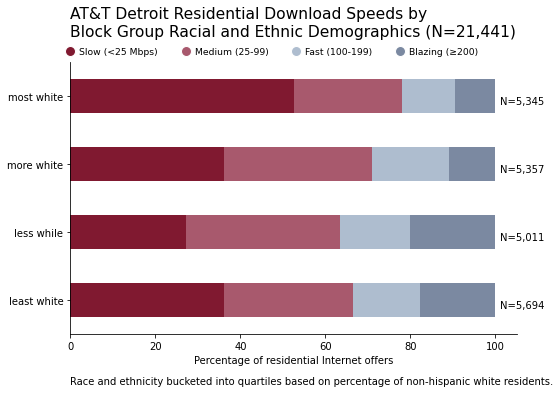

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


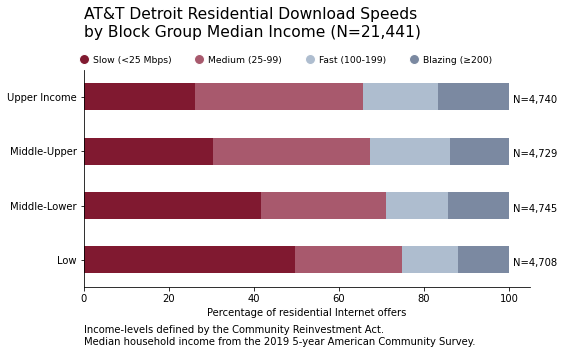

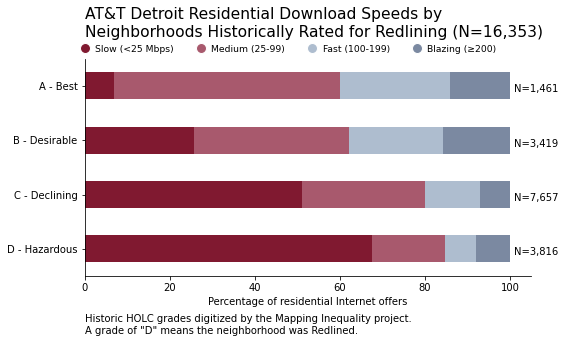

*******************************************************************************
houston


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


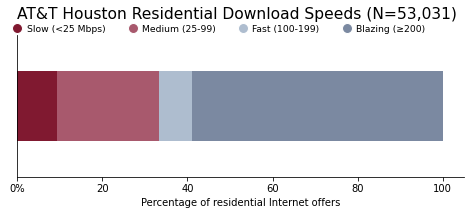

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


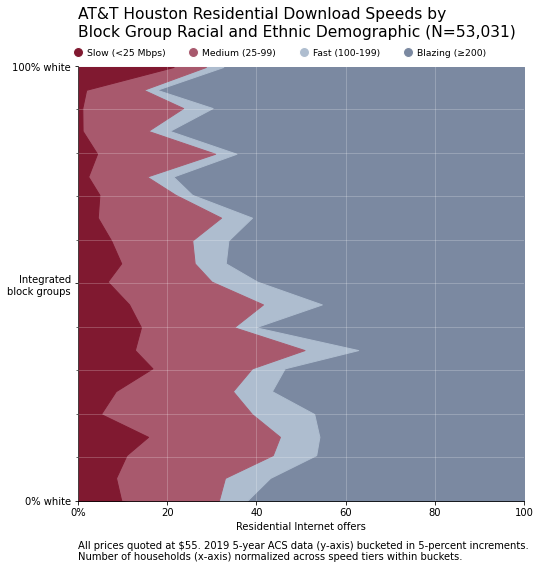

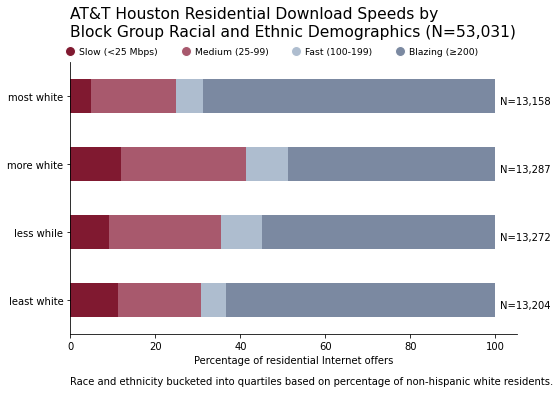

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


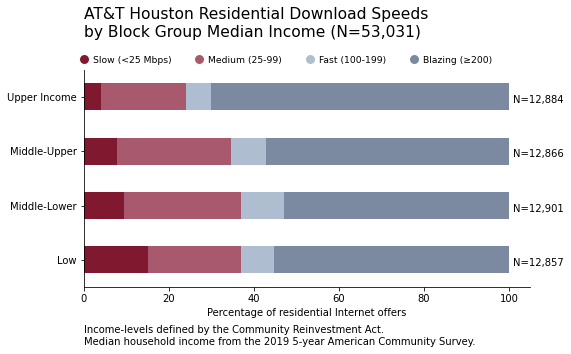

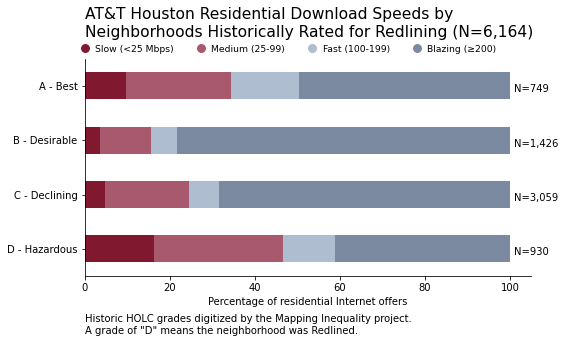

*******************************************************************************
huntsville


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


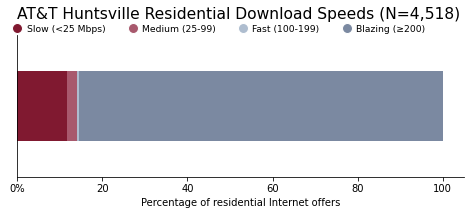

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


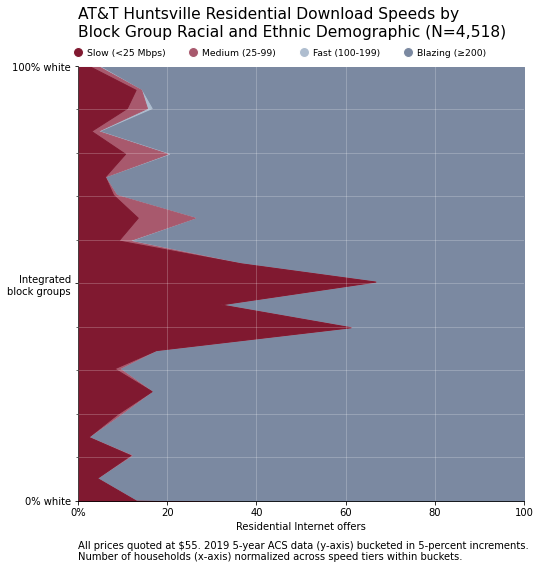

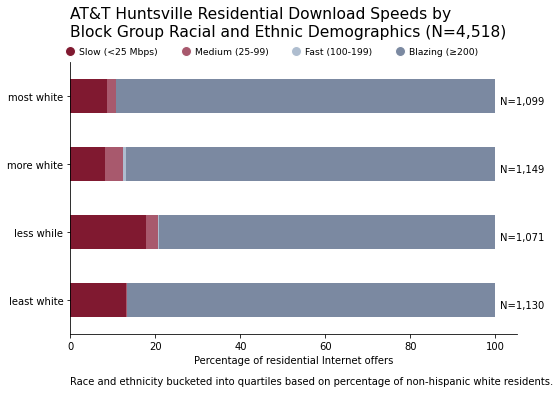

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


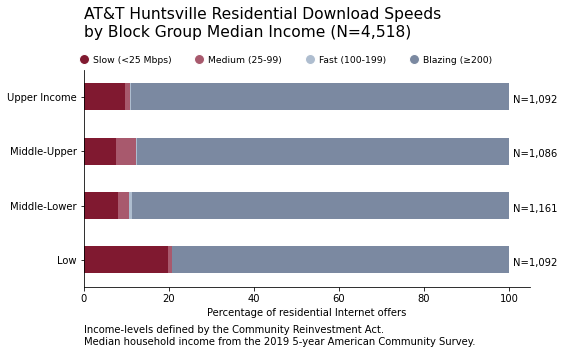

*******************************************************************************
indianapolis


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


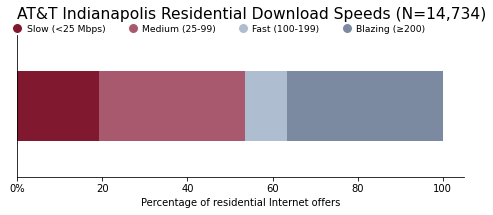

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


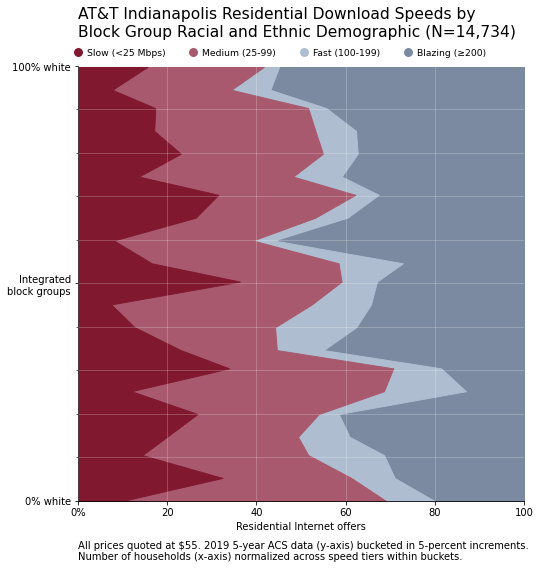

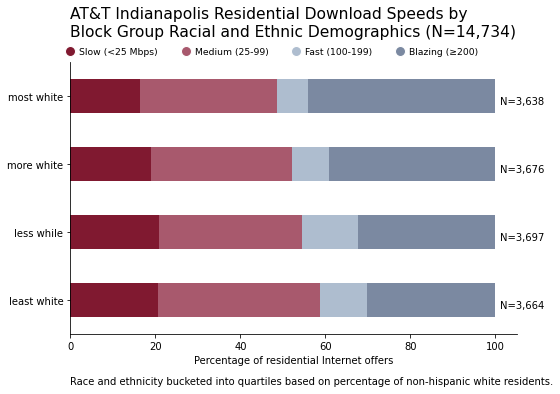

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


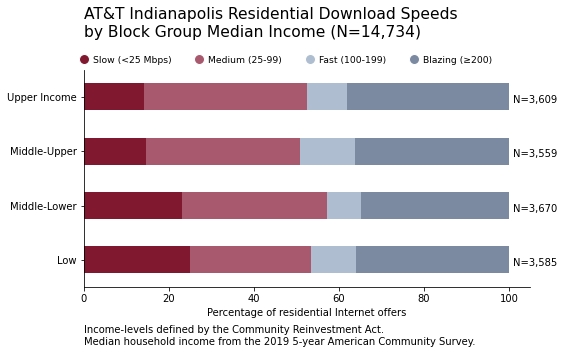

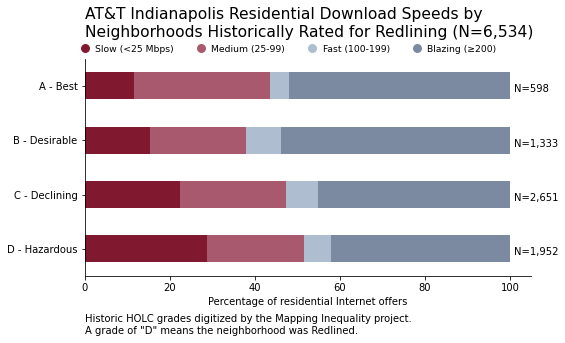

*******************************************************************************
jackson


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


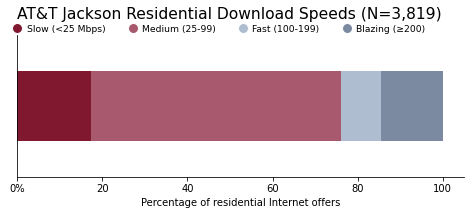

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


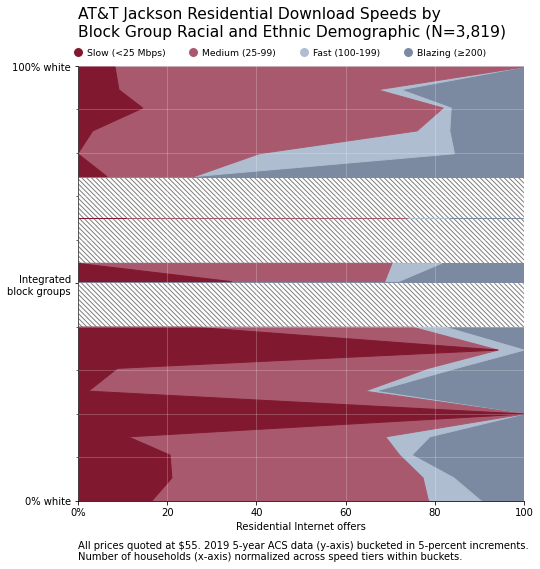

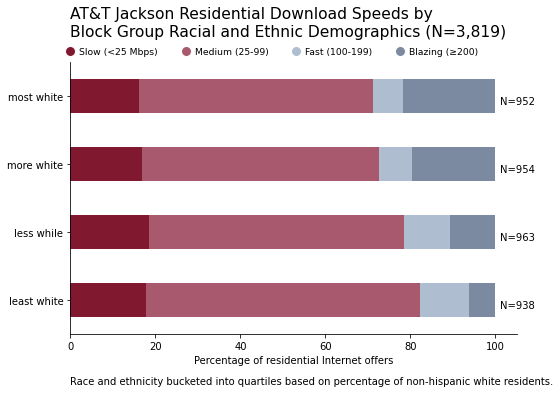

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


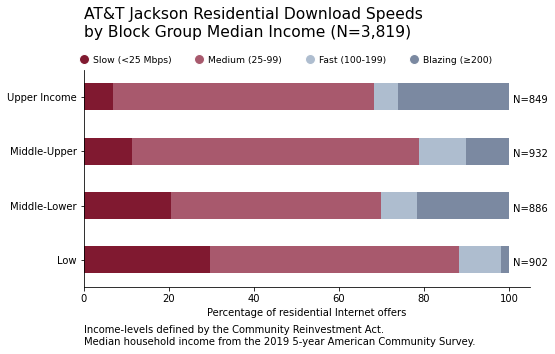

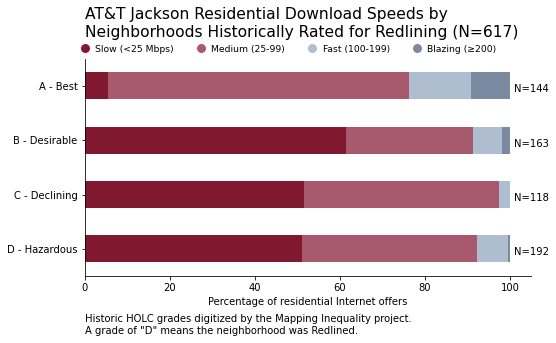

*******************************************************************************
jacksonville


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


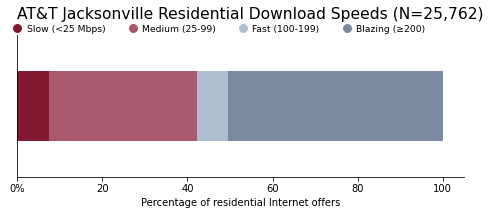

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


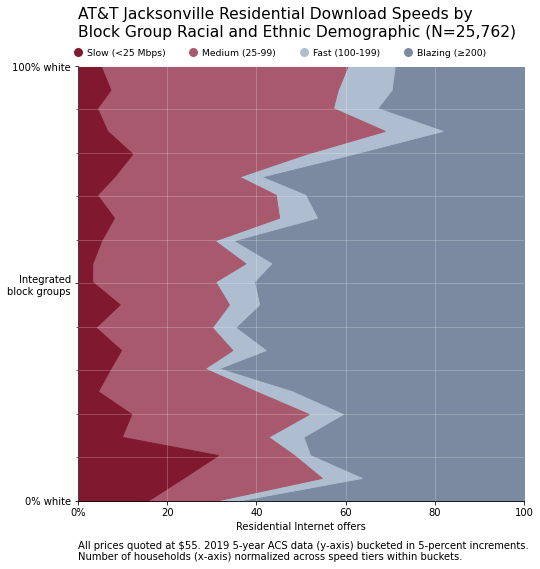

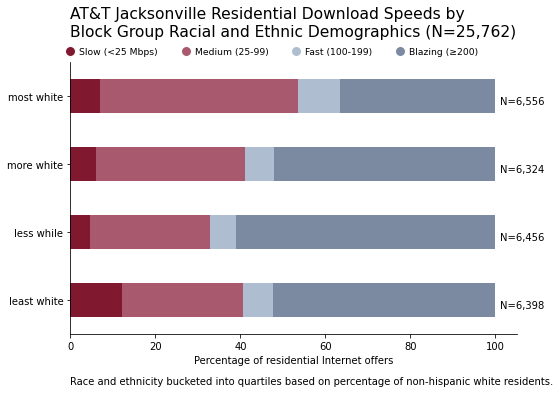

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


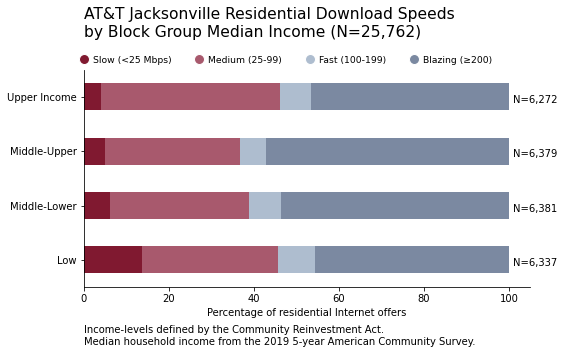

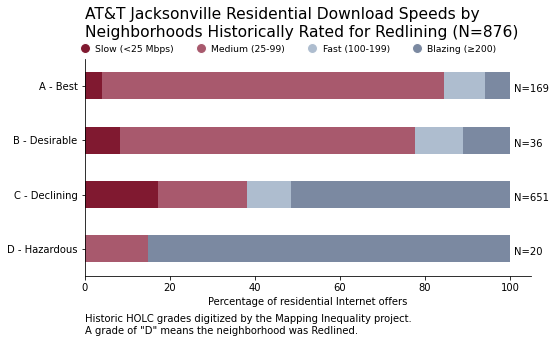

*******************************************************************************
kansas city


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


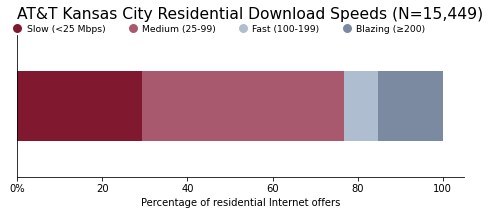

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


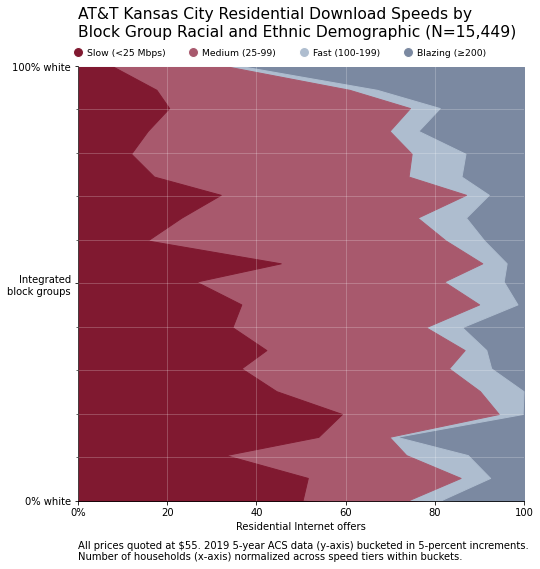

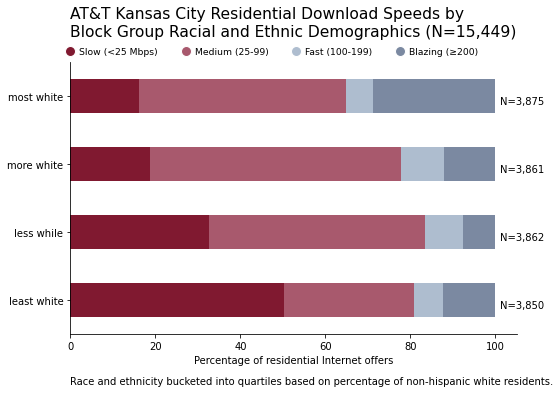

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


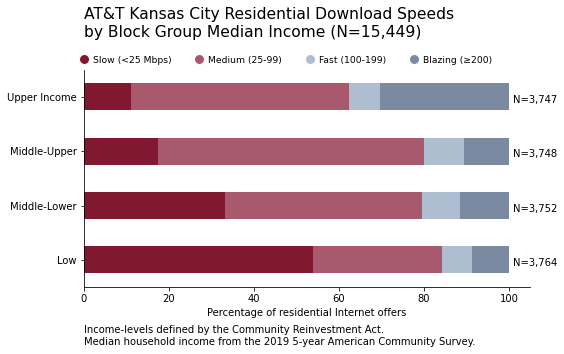

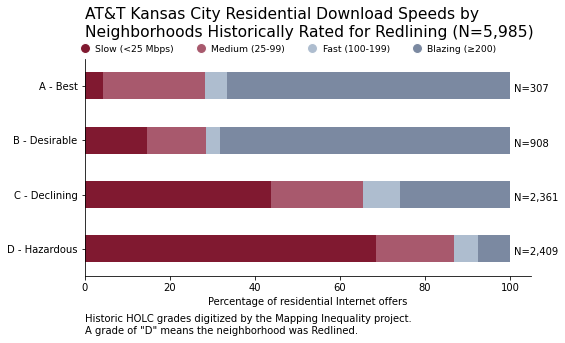

*******************************************************************************
little rock


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


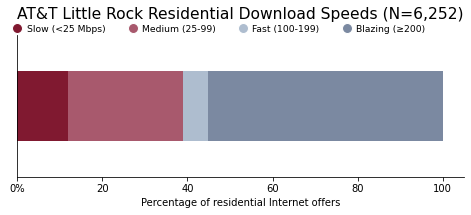

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


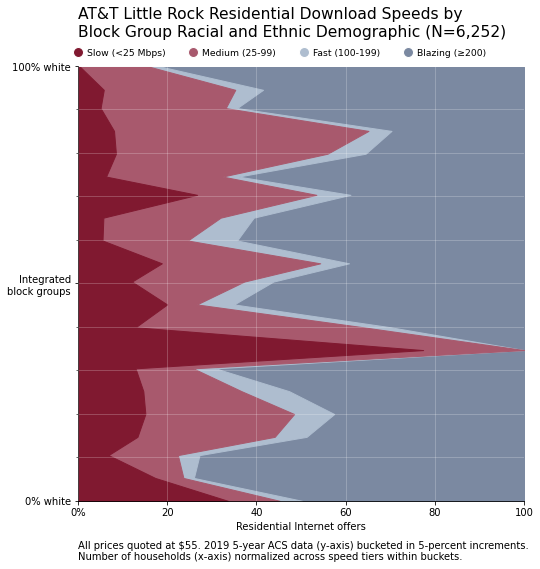

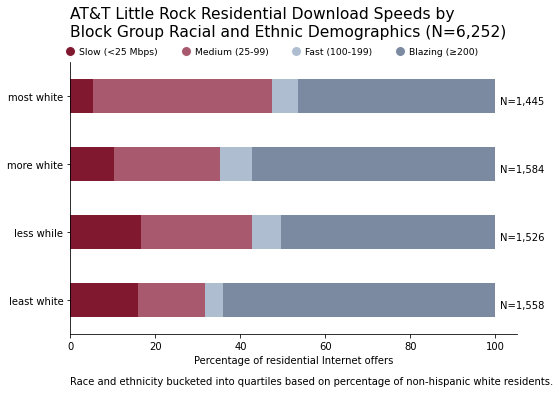

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


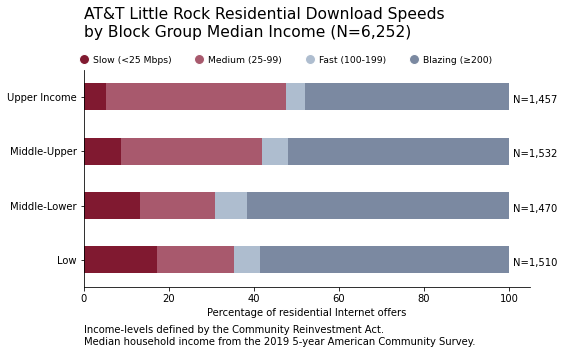

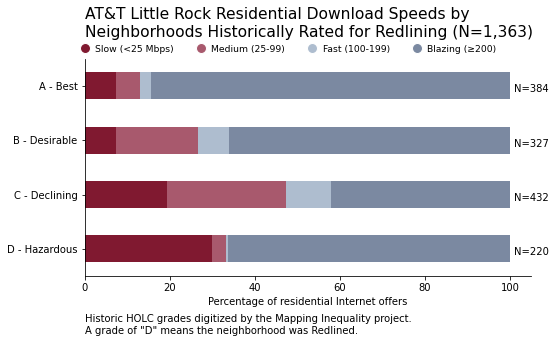

*******************************************************************************
los angeles


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


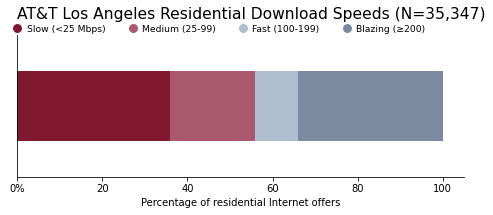

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


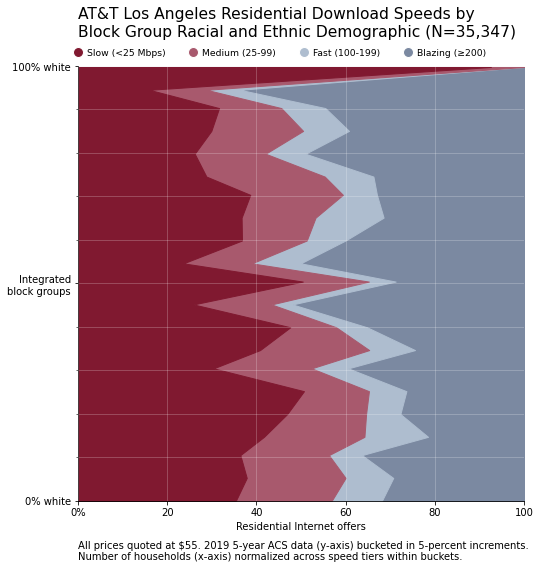

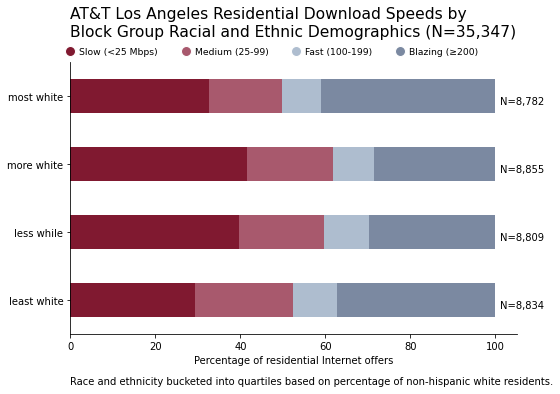

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


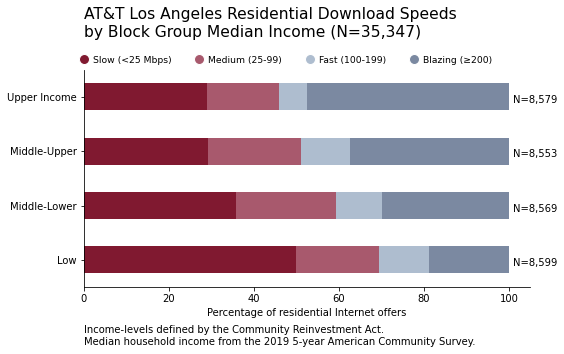

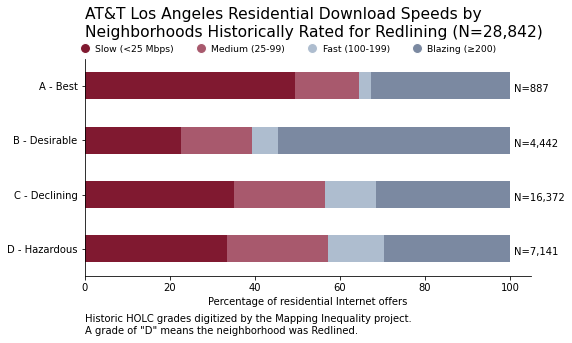

*******************************************************************************
louisville


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


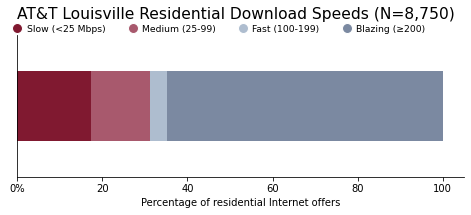

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


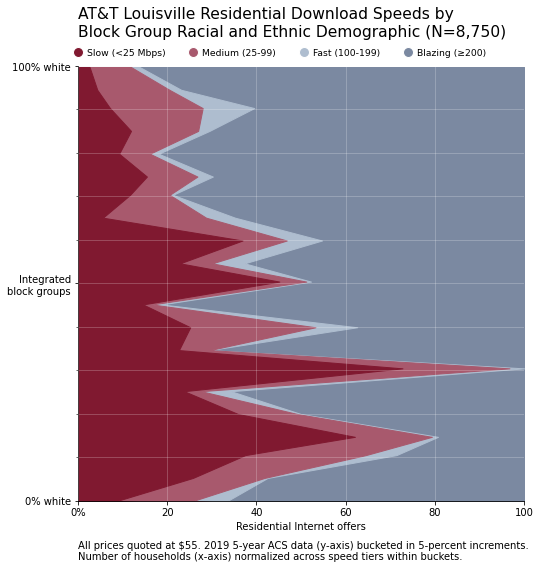

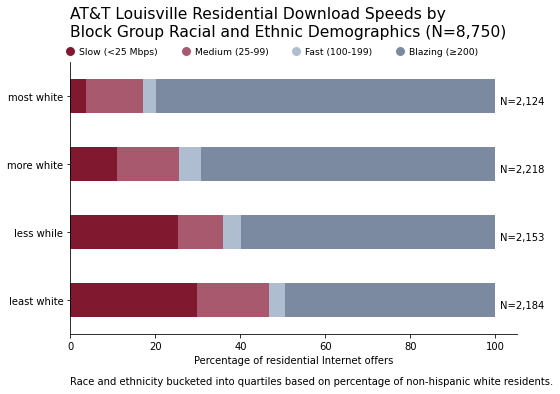

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


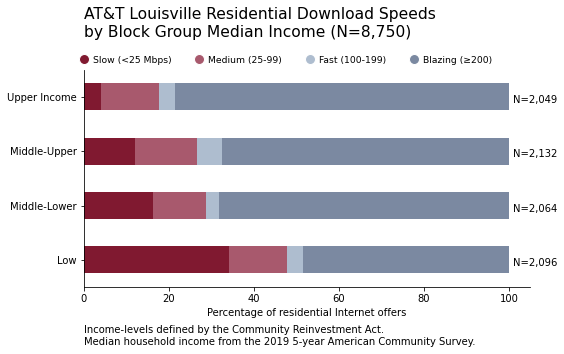

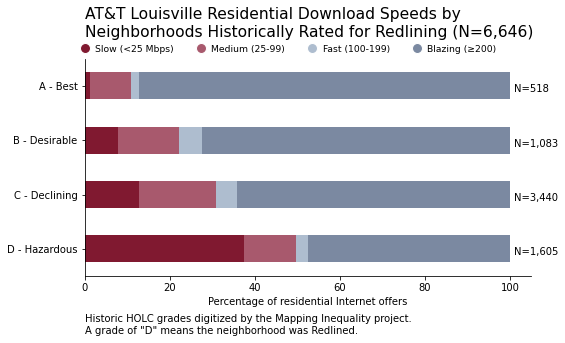

*******************************************************************************
milwaukee


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


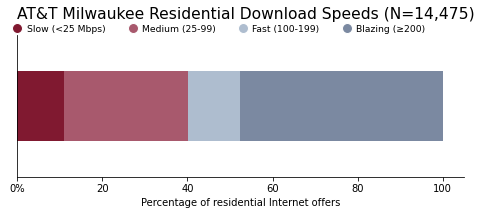

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


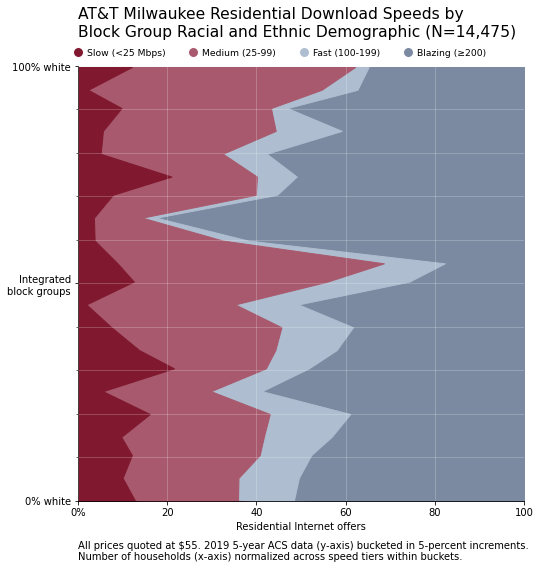

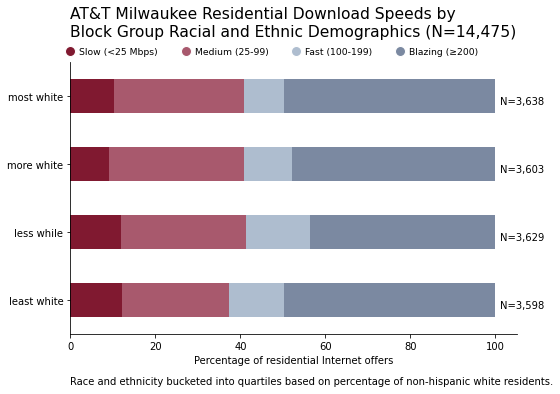

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


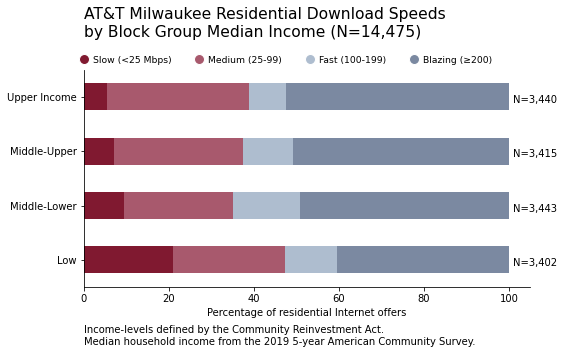

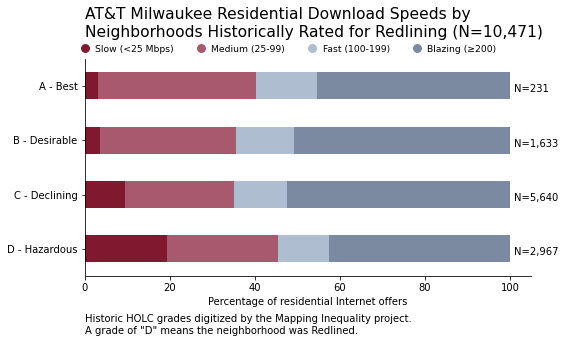

*******************************************************************************
nashville


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


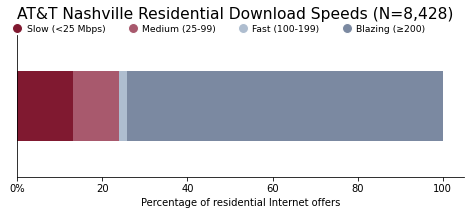

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


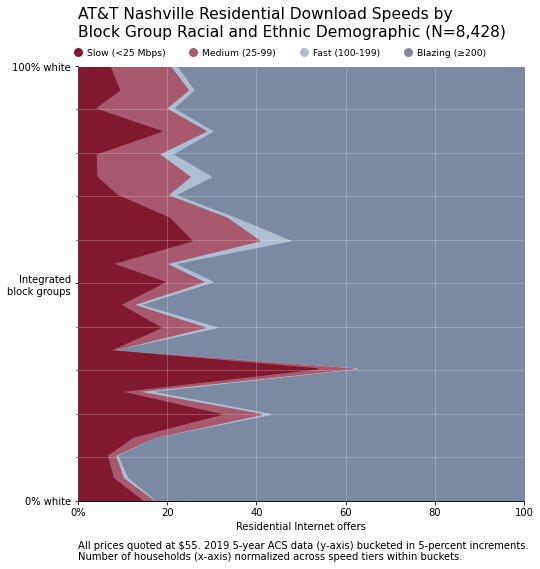

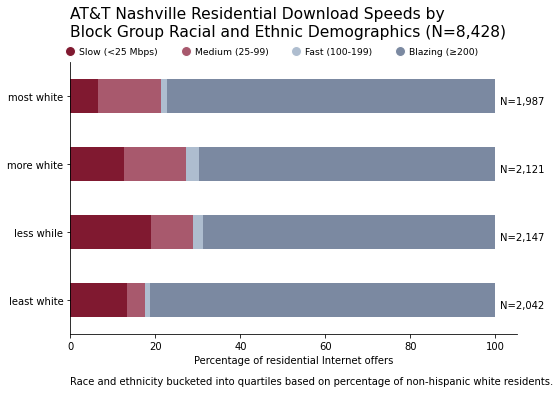

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


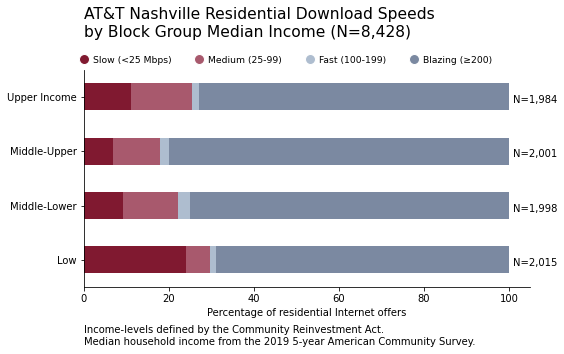

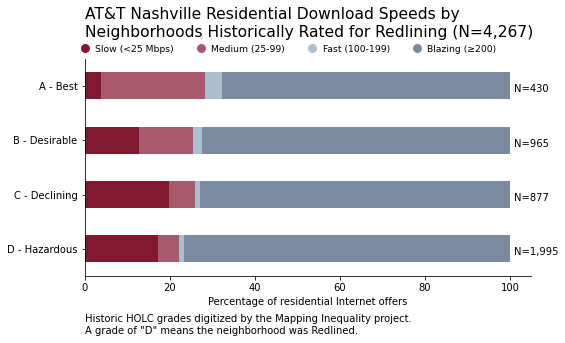

*******************************************************************************
new orleans


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


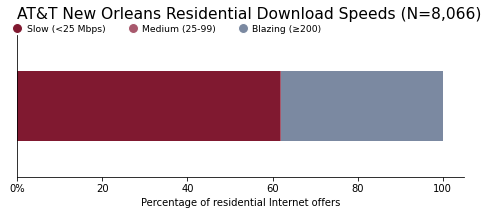

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


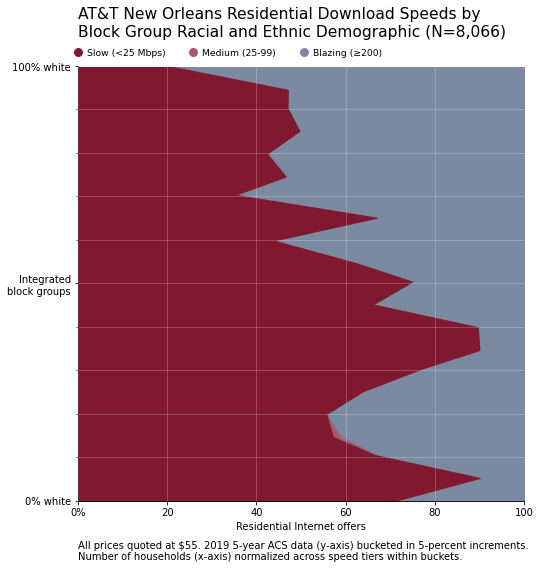

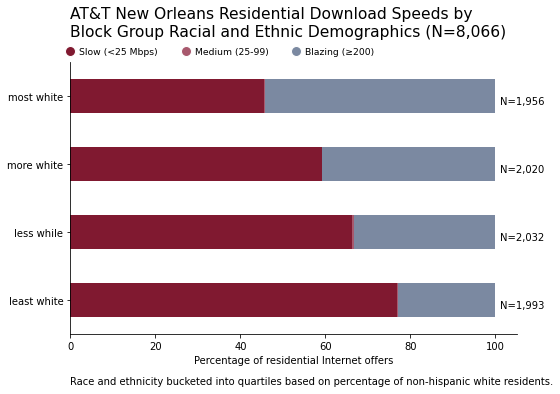

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


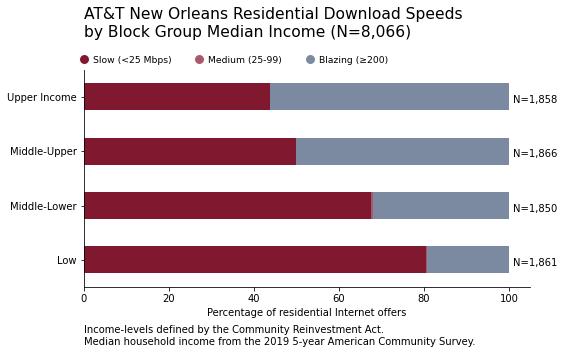

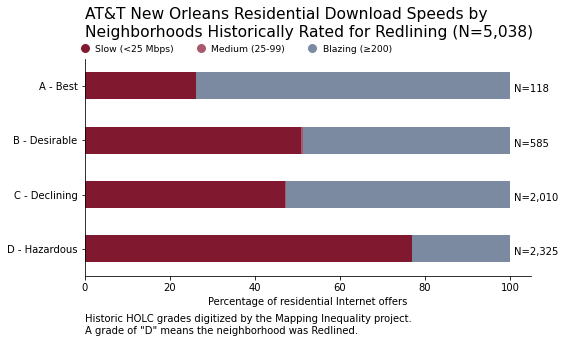

*******************************************************************************
oklahoma city


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


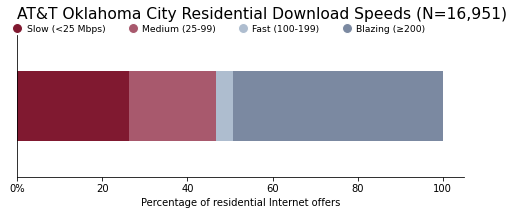

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


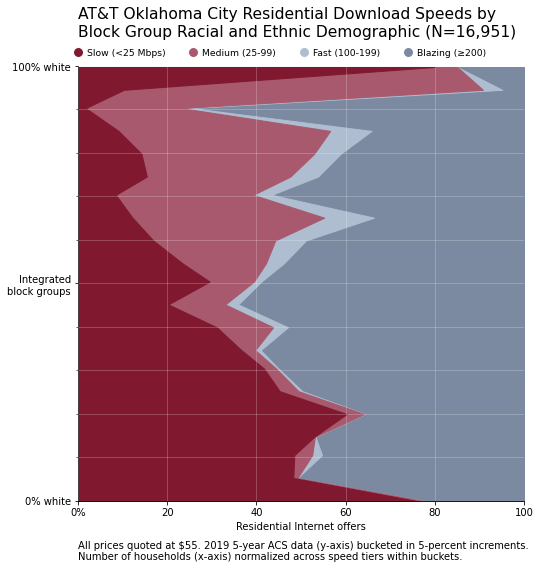

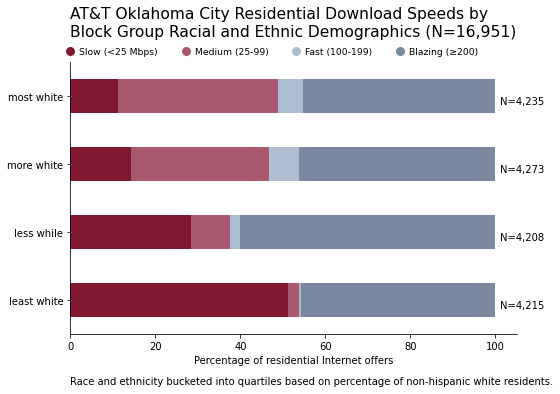

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


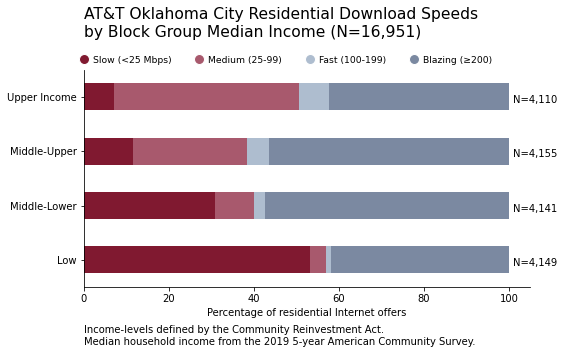

*******************************************************************************
wichita


/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:145: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


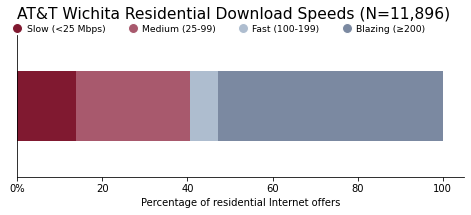

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


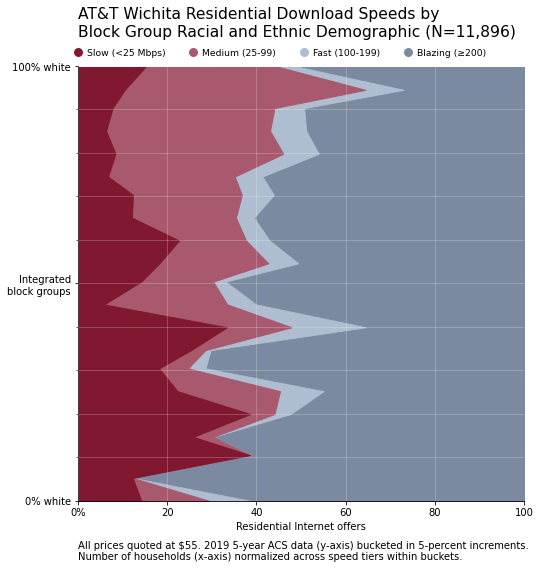

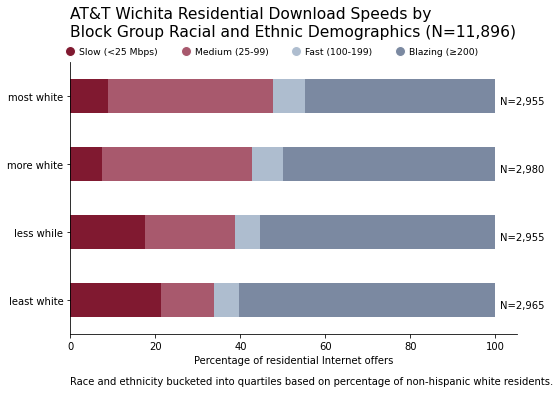

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:230: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


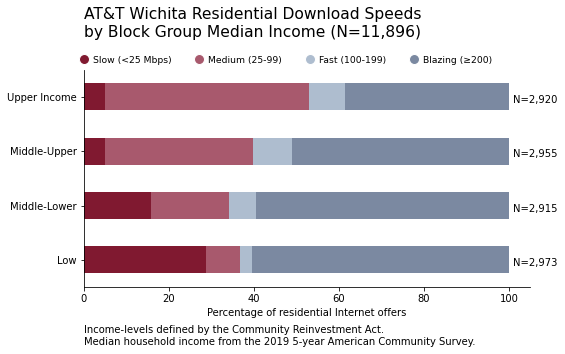

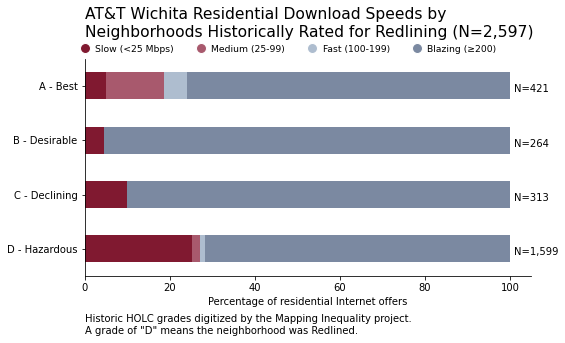

*******************************************************************************


In [21]:
for city, _df in att.groupby('major_city'):
    print(city)
    _df = bucket_and_bin(_df)
    speed_breakdown(_df, location=city.title())
    plot_race(_df, location=city.title())
    race(_df, location=city.title())
    income(_df, location=city.title())
    redlining(_df, location=city.title())
    fn_out = f'../data/intermediary/maps/att/{city}_offers.csv'
    if not os.path.exists(fn_out):
        os.makedirs(os.path.dirname(fn_out), exist_ok=True)
        _df.to_csv(fn_out, index=False)
    print("*" * 79)

## One city's graphs as an example

In [22]:
from pandas.api.types import CategoricalDtype
from config import income_labels

In [23]:
# outputs
fn_fig3a = '../data/output/figs/fig3_income.csv'
fn_fig3b = '../data/output/figs/fig3_race.csv'
fn_fig3c = '../data/output/figs/fig3_redline.csv'

In [24]:
df_city = bucket_and_bin(att[att.major_city == 'kansas city'])

In [25]:
df_city.loc[:, 'income_level'] = df_city['income_level'].astype(
     CategoricalDtype(income_labels, ordered=True)
).copy(deep=True)

to_plot = (df_city.groupby('income_level').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3a)

<ipython-input-25-e28746b9c62d>:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_city.loc[:, 'income_level'] = df_city['income_level'].astype(


In [26]:
to_plot = (df_city.groupby('race_quantile').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3b)

In [27]:
to_plot = (df_city.groupby('redlining_grade').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3c)

In [28]:
# outputs
fn_fig_story_a = '../data/output/figs/story_income_{city}.csv'
fn_fig_story_b = '../data/output/figs/story_race_{city}.csv'
fn_fig_story_c = '../data/output/figs/story_redline_{city}.csv'

In [29]:
for city in ['new orleans']:
    df_city = bucket_and_bin(att[att.major_city == city])
    df_city.loc[:, 'income_level'] = df_city['income_level'].astype(
         CategoricalDtype(income_labels, ordered=True)
    ).copy(deep=True)

    to_plot = (df_city.groupby('income_level').speed_down_bins
                 .value_counts(normalize=True)
                 .sort_index() * 100 ).unstack()
    to_plot['major_city'] = city
    to_plot.to_csv(fn_fig_story_a.format(city=city.replace(' ', '_')))
    to_plot = (df_city.groupby('race_quantile').speed_down_bins
                 .value_counts(normalize=True)
                 .sort_index() * 100 ).unstack()
    to_plot['major_city'] = city
    to_plot.to_csv(fn_fig_story_b.format(city=city.replace(' ', '_')))
    to_plot = (df_city.groupby('redlining_grade').speed_down_bins
                 .value_counts(normalize=True)
                 .sort_index() * 100 ).unstack()
    to_plot['major_city'] = city
    to_plot.to_csv(fn_fig_story_c.format(city=city.replace(' ', '_')))

<ipython-input-29-1fc2c4f5d3da>:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_city.loc[:, 'income_level'] = df_city['income_level'].astype(


In [30]:
# how many addresses got 6 Mbps or less
len(att[att.speed_down <= 6])

33671

In [31]:
# how many cities got 6 Mbps or less
att[att.speed_down <= 6].major_city.nunique()

20

In [32]:
# how many addresses below 25 Mbps were also offered an upgrade?
att[(att.speed_down < att.fastest_speed_down) & 
    (att.speed_down < 25)]

,address_full,incorporated_place,major_city,state,lat,lon,availability_status,block_group,collection_datetime,provider,...,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income,income_level,speed_down_bins,race_quantile,is_slow,race_perc,color


In [33]:

col2description = {
    "address_full": "The complete postal address of a household we searched.",
    "incorporated_place": "The incorporated city that the address belongs to",
    "major_city": "The city that the address is in.",
    "state": "The state the that the address is in.",
    "lat": "The latitudinal coordinate that the address is in.",
    "lon": "The Longitudinal coorindate that the address is in.",
    "block_group": "The census block group of the address as of 2019.",
    "collection_datetime": "The unix timestamp that the address was used to query the provider's website",
    "provider": "The internet service provider",
    "speed_down": "Cheapest advertised download speed for the address.",
    "speed_up": "Cheapest advertised upload speed for the address.",
    "speed_unit": "The unit of speed, should always be Megabits per second (Mbps).",
    "price": "The cost in USD of the cheapest advertised internet plan for the address",
    "technology": "The kind of technology (Fiber or non-Fiber) used to serve the cheapest internet plan",
    "package": "The name of the cheapest internet plan",
    "fastest_speed_down": "The advertised download speed of the fastest package. This is usually the same as the cheapest plan if the `speed_down` is less than 200 Mbps.",
    "fastest_speed_price": "The advertised upload speed of the fastest internet package for the address.",
    "fn": "The filename of the JSON API response the row of data is parsed from.",
    "redlining_grade": "The redlining grade, merged from Mapping Inequality based on the `lat` and `lon` of the adddress.",
    "geoid": "The Census bureau's GEOID for the address",
    "race_perc_non_white": "The percentage of people of color (not non-Hispanic White) in the Census block group. Sourced from the 2019 5-year American Community Survey.",
    "income_lmi": "`median_household_income` divided by the city median household income.",
    "ppl_per_sq_mile": "People per square mile is used to determine population density. Sourced from 2019 TIGER shape files from the U.S. Census Bureau.",
    "n_providers": "The number of other competitors in the addresses` Census block group. Sourced from FCC form 477.",
    "income_dollars_below_median": "City median household income minus the `median_household_income`.",
    "internet_perc_broadband": "The percentage of the population that is already subscriped to broadband in an addresses' Census block group.",
    "median_household_income": "The median household income in the addresses' Census block group. Sourced from the 2019 5-year American Community Survey",
    "income_level": "How we categorized income. We binned `median_household_income` into quartiles",
    "speed_down_bins": "How we categorized addresses by `speed_down`.",
    "race_quantile": "How we categorized race and ethnicity. We binned `race_perc_non_white` into quartiles.",
    "is_slow": "`True` if `speed_down` is below 25 Mbps.",
}

series = pd.Series(col2description, name='description')
series = series.rename_axis('column')

print(series.to_markdown())

| column                      | description                                                                                                                                    |
|:----------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------|
| address_full                | The complete postal address of a household we searched.                                                                                        |
| incorporated_place          | The incorporated city that the address belongs to                                                                                              |
| major_city                  | The city that the address is in.                                                                                                               |
| state                       | The state the that the address is in.                                              